The Benchmark Dataset is applied as an example. Firstly, we need to initialize the dataset.

In [1]:
import sys
sys.path.append('..')
from SSVEPAnalysisToolbox.datasets import BenchmarkDataset
from SSVEPAnalysisToolbox.utils.benchmarkpreprocess import (
    preprocess, filterbank
)
dataset = BenchmarkDataset(path = '2016_Tsinghua_SSVEP_database')
dataset.regist_preprocess(preprocess)
dataset.regist_filterbank(filterbank)

This example uses first 1 second signal length and only consider 9 occipital channel to compute the phases.

In [3]:
sig_len = 1
from SSVEPAnalysisToolbox.utils.algsupport import nextpow2
from SSVEPAnalysisToolbox.utils.benchmarkpreprocess import suggested_ch
phase = dataset.get_phase(display_progress = True, 
                      sig_len = sig_len,
                      remove_break = False, remove_pre_and_latency = False, remove_target_phase = True,
                      NFFT = 2 ** nextpow2(10*dataset.srate)) # filterbank index is 0
phase_list = phase[:,:,:,suggested_ch()]

100.000%|████████████████████████████████████████████████████████████████████████████████████████████████| 210/210 [Time: 06:23<00:00]


Then, we can plot the phase distribution. 

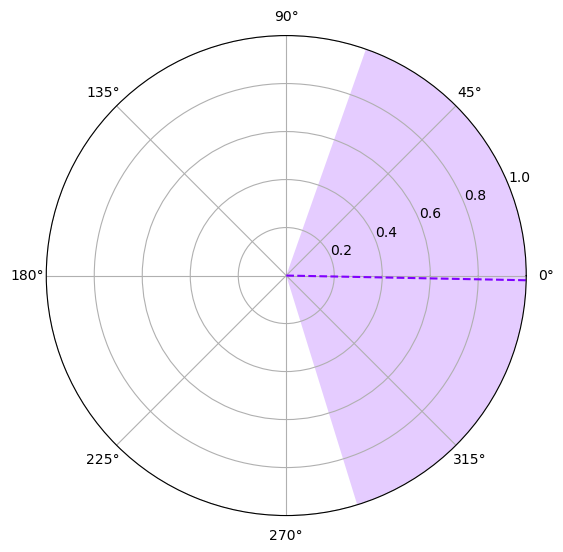

In [5]:
from SSVEPAnalysisToolbox.evaluator import (
    polar_phase_shadow, gen_colors
)
color = gen_colors(1)
fig, ax = polar_phase_shadow(phase_list,
                            color = color,
                            grid = True,
                            errorbar_type = 'std')
fig.savefig('res/phase_benchmark.jpg', bbox_inches='tight', dpi=300)